# 　モチベーション　スコアリング

感情分析に結果から、自身のモチベーションを数値化（３段階色付け）  

方法
- 感情スコアからPCAにてポジティブなモチベーション系統の軸を検出（複数必要なら加算※重みは要検証）
- モチベーション系統のスコアから、正規化
- 本番運用時用に関数を置いておく

In [227]:
import importlib
import pickle
from tqdm import tqdm

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from src import data
from src import models
from src.models import train_model
from src.models import predict_model

In [228]:
plt.rcParams['font.family'] = 'Meirio'
sns.set(font='Meirio')

In [243]:
importlib.reload(data)

<module 'src.data' from '/Users/satouatsushi/sub_business/diary_emotion/src/data/__init__.py'>

# データ読み込み

In [244]:
preprocess_df = data.read_csv(data.PREPROCESS_DATA_PATH_NOTEBOOK)

In [245]:
preprocess_df.head()

,Sentence,answer
0,ぼけっとしてたらこんな時間｡チャリあるから食べにでたいのに…,"[0.0, 0.16666666666666666, 0.3333333333333333,..."
1,今日の月も白くて明るい。昨日より雲が少なくてキレイな? と立ち止まる帰り道｡チャリなし生活も...,"[0.3333333333333333, 0.0, 0.3333333333333333, ..."
2,早寝するつもりが飲み物がなくなりコンビニへ｡ん､今日、風が涼しいな。,"[0.16666666666666666, 0.16666666666666666, 0.1..."
3,眠い、眠れない。,"[0.0, 0.4, 0.2, 0.0, 0.0, 0.2, 0.0, 0.2]"
4,ただいま? って新体操してるやん!外食する気満々で家に何もないのに!テレビから離れられない…!,"[0.18181818181818182, 0.09090909090909091, 0.2..."


# 学習済みモデル　読み込み

In [246]:
TOKEN_PATH = models.TOKEN_PATH_NOTEBOOK
MODEL_PATH = models.MODEL_PATH_NOTEBOOK

tokenizer = AutoTokenizer.from_pretrained(TOKEN_PATH)
model = AutoModelForSequenceClassification.from_pretrained(MODEL_PATH)

# 予測

In [29]:
# 学習用データの感情予測

emotion_df = pd.DataFrame()
for i, sentence in enumerate(tqdm(preprocess_df['Sentence'])):

    emotion = predict_model.analyze_emotion(model, tokenizer, sentence)
    a_emotion_df = pd.DataFrame(emotion.values(), index=emotion.keys()).T
    a_emotion_df['sentence'] = sentence

    if i == 0:
        emotion_df = pd.DataFrame(emotion.values(), index=emotion.keys()).T
    else:
        emotion_df = pd.concat([emotion_df, a_emotion_df])

100%|██████████| 30151/30151 [28:00<00:00, 17.94it/s]   


In [31]:
emotion_df.head()

,喜び,悲しみ,期待,驚き,怒り,恐れ,嫌悪,信頼,sentence
0,0.036426,0.561465,0.063972,0.018181,0.049425,0.067017,0.186781,0.016733,NaN
0,0.303455,0.214967,0.147156,0.067771,0.021114,0.085315,0.067515,0.092707,今日の月も白くて明るい。昨日より雲が少なくてキレイな? と立ち止まる帰り道｡チャリなし生活も...
0,0.298980,0.421744,0.100800,0.048656,0.012347,0.040450,0.038248,0.038775,早寝するつもりが飲み物がなくなりコンビニへ｡ん､今日、風が涼しいな。
0,0.020254,0.581129,0.016684,0.027988,0.025953,0.086389,0.228131,0.013472,眠い、眠れない。
0,0.136836,0.162580,0.148636,0.328487,0.033160,0.083429,0.054678,0.052194,ただいま? って新体操してるやん!外食する気満々で家に何もないのに!テレビから離れられない…!


In [33]:
emotion_df.to_csv('../data/interim/raw_data_emotion.csv',
                  encoding='utf-8-sig',
                  index=False)

# モチベーションスコア

## 相関係数

findfont: Font family 'Meirio' not found.
findfont: Font family 'Meirio' not found.
/Users/satouatsushi/sub_business/diary_emotion/venv/lib/python3.9/site-packages/seaborn/utils.py:84: UserWarning: Glyph 21916 (\N{CJK UNIFIED IDEOGRAPH-559C}) missing from current font.
  fig.canvas.draw()
/Users/satouatsushi/sub_business/diary_emotion/venv/lib/python3.9/site-packages/seaborn/utils.py:84: UserWarning: Glyph 12403 (\N{HIRAGANA LETTER BI}) missing from current font.
  fig.canvas.draw()
findfont: Font family 'Meirio' not found.
/Users/satouatsushi/sub_business/diary_emotion/venv/lib/python3.9/site-packages/seaborn/utils.py:84: UserWarning: Glyph 24754 (\N{CJK UNIFIED IDEOGRAPH-60B2}) missing from current font.
  fig.canvas.draw()
/Users/satouatsushi/sub_business/diary_emotion/venv/lib/python3.9/site-packages/seaborn/utils.py:84: UserWarning: Glyph 12375 (\N{HIRAGANA LETTER SI}) missing from current font.
  fig.canvas.draw()
/Users/satouatsushi/sub_business/diary_emotion/venv/lib/python3.9/

findfont: Font family 'Meirio' not found.
findfont: Font family 'Meirio' not found.
findfont: Font family 'Meirio' not found.
findfont: Font family 'Meirio' not found.
findfont: Font family 'Meirio' not found.
findfont: Font family 'Meirio' not found.
findfont: Font family 'Meirio' not found.
findfont: Font family 'Meirio' not found.
findfont: Font family 'Meirio' not found.
findfont: Font family 'Meirio' not found.
findfont: Font family 'Meirio' not found.
findfont: Font family 'Meirio' not found.
findfont: Font family 'Meirio' not found.
findfont: Font family 'Meirio' not found.
findfont: Font family 'Meirio' not found.
findfont: Font family 'Meirio' not found.
findfont: Font family 'Meirio' not found.
findfont: Font family 'Meirio' not found.
findfont: Font family 'Meirio' not found.
findfont: Font family 'Meirio' not found.
findfont: Font family 'Meirio' not found.
findfont: Font family 'Meirio' not found.
findfont: Font family 'Meirio' not found.
findfont: Font family 'Meirio' not

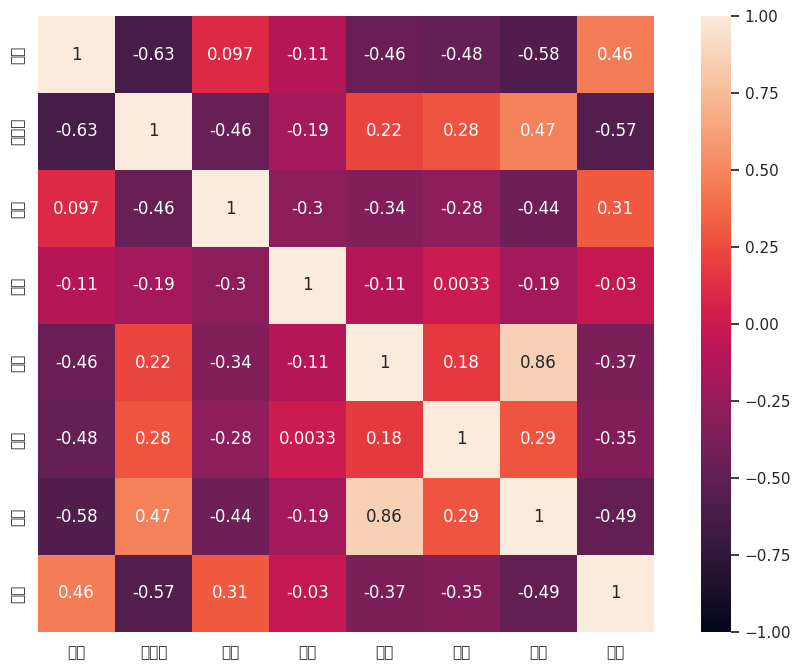

In [44]:
# 相関行列
corr = emotion_df.drop('sentence', axis=1).corr()

plt.rcParams['font.size'] = 12
plt.figure(figsize=(12, 8))
sns.heatmap(corr,
            vmax=1,
            vmin=-1,
            # cmap='seismic',
            square=True,
            annot=True,
            xticklabels=1,
            yticklabels=1)
plt.xlim([0, corr.shape[0]])
plt.show()

## PCA

In [231]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(emotion_df.drop('sentence', axis=1))

pca_cols = list(emotion_df.drop('sentence', axis=1).columns)
# pca = Pca(scaled_data, pca_cols)
pca = train_model.Pca(scaled_data, pca_cols)
pca.fit()

### 主成分確認

In [232]:
loadings = pca.loadings()
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
喜び,-0.409408,-0.008379,0.307921,-0.436036,0.327825,-0.380690,-0.003943,-0.543104
悲しみ,0.396337,-0.001002,-0.348797,-0.496985,-0.248717,0.354401,0.198260,-0.497488
期待,-0.296606,-0.457616,-0.356095,0.492740,-0.324559,-0.165773,-0.031464,-0.446325
驚き,-0.021856,0.791428,0.191966,0.335589,-0.314139,0.005471,-0.053930,-0.349388
怒り,0.382462,-0.251407,0.533821,0.276196,0.017748,-0.068069,0.633964,-0.149698
恐れ,0.287825,0.186466,-0.427044,0.314245,0.741408,-0.090935,0.044456,-0.203319
嫌悪,0.459257,-0.242838,0.339228,0.081441,0.032289,0.052812,-0.743473,-0.227641
信頼,-0.383161,-0.084929,0.193554,0.160620,0.274963,0.828416,0.011799,-0.143862


### 寄与度

In [233]:
# contribution_ratios = pd.DataFrame(pca.explained_variance_ratio_)
contribution_ratios = pca.contribution()
contribution_ratios

,contribution,cumsum
0,4.405305e-01,0.440530
1,1.589225e-01,0.599453
2,1.313117e-01,0.730765
3,1.040645e-01,0.834829
4,8.767026e-02,0.922499
5,6.549120e-02,0.987991
6,1.200929e-02,1.000000
7,6.038032e-13,1.000000


**[結論]**
- ポジティブ系統は、PC1(ネガティブが正になっているので、符号変更は必須)

## スコアリング

In [234]:
# ポジティブスコアにしたいため、数値を逆転
score = pca.score()
score = score[['PC1']]
score['PC1'] = score['PC1'] * -1
score

,PC1
0,-2.170068
1,0.236074
2,-0.230539
3,-2.447584
4,-0.178635
...,...
30146,2.316539
30147,1.489251
30148,2.398954
30149,1.549669


In [235]:
minmax_scaler = MinMaxScaler()
motivation_score = minmax_scaler.fit_transform(score)

In [236]:
motivation_score

array([[0.30767715],
       [0.6068417 ],
       [0.548826  ],
       ...,
       [0.87576056],
       [0.77016586],
       [0.80413735]], dtype=float32)

(array([ 486.,  961., 3578., 4335., 2322., 2211., 2921., 7014., 5956.,
         367.]),
 array([0.        , 0.1       , 0.2       , 0.30000001, 0.40000001,
        0.5       , 0.60000002, 0.69999999, 0.80000001, 0.89999998,
        1.        ]),
 <BarContainer object of 10 artists>)

findfont: Font family 'Meirio' not found.
findfont: Font family 'Meirio' not found.
findfont: Font family 'Meirio' not found.
findfont: Font family 'Meirio' not found.
findfont: Font family 'Meirio' not found.
findfont: Font family 'Meirio' not found.
findfont: Font family 'Meirio' not found.
findfont: Font family 'Meirio' not found.
findfont: Font family 'Meirio' not found.
findfont: Font family 'Meirio' not found.
findfont: Font family 'Meirio' not found.
findfont: Font family 'Meirio' not found.
findfont: Font family 'Meirio' not found.
findfont: Font family 'Meirio' not found.
findfont: Font family 'Meirio' not found.
findfont: Font family 'Meirio' not found.
findfont: Font family 'Meirio' not found.
findfont: Font family 'Meirio' not found.
findfont: Font family 'Meirio' not found.
findfont: Font family 'Meirio' not found.
findfont: Font family 'Meirio' not found.
findfont: Font family 'Meirio' not found.
findfont: Font family 'Meirio' not found.
findfont: Font family 'Meirio' not

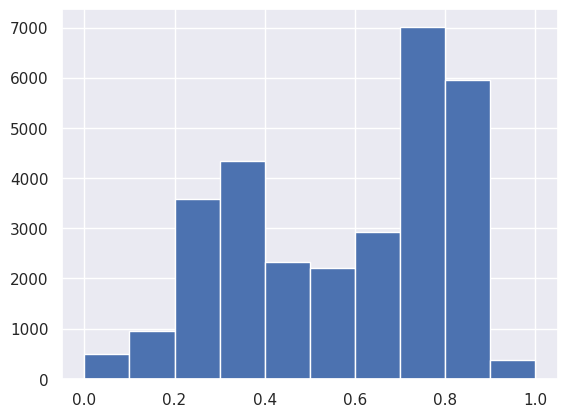

In [237]:
plt.hist(motivation_score)

# 保存

In [238]:
# 今後予測データでも適合するように、訓練したモデルを保存

pickle.dump(scaler, open(models.STANDARD_SCALER_PATH_NOTEBOOK, 'wb'))
pickle.dump(pca, open(models.PCA_PATH_NOTEBOOK, 'wb'))
pickle.dump(minmax_scaler, open(models.MINMAX_SCALER_PATH_NOTEBOOK, 'wb'))

# 使用する場合
# loaded_model = pickle.load(open(filename, 'rb'))

# 予測データに対するスコアリング

In [239]:
sentence = 'テストテスト 今日から冬休みが始まりました。今週の予定は自己啓発に取り組み、来週からは実家に帰省します。久々の休みなのでゆっくりしたいと思います。ありがとうございました。'
emotion = predict_model.analyze_emotion(model, tokenizer, sentence)
a_emotion_df = pd.DataFrame(emotion.values(), index=emotion.keys()).T

In [240]:
a_emotion_df 

,喜び,悲しみ,期待,驚き,怒り,恐れ,嫌悪,信頼
0,0.406536,0.046457,0.354519,0.018474,0.004966,0.011101,0.009053,0.148894


In [241]:
standard_scaler = pickle.load(open(models.STANDARD_SCALER_PATH_NOTEBOOK, 'rb'))
pca = pickle.load(open(models.PCA_PATH_NOTEBOOK, 'rb'))
minmax_scaler = pickle.load(open(models.MINMAX_SCALER_PATH_NOTEBOOK, 'rb'))

# スコアリング
scaled_x = standard_scaler.transform(a_emotion_df)

pca_df = pd.DataFrame(pca.transform(scaled_x))
pca_df = pca_df.rename(columns=pca.rename_pc_cols)
pca_df = pca_df[['PC1']]
pca_df['PC1'] = pca_df['PC1'] * -1

motivation_score = minmax_scaler.transform(pca_df)
a_emotion_df['モチベーションスコア'] = motivation_score

In [242]:
a_emotion_df

,喜び,悲しみ,期待,驚き,怒り,恐れ,嫌悪,信頼,モチベーションスコア
0,0.406536,0.046457,0.354519,0.018474,0.004966,0.011101,0.009053,0.148894,0.828807
